## Pair-wise PEC Analysis Validation: Simulation

#### This notebook generates a simulation of three information sources (letters, digits and mix of the two) as a binary code distributed across a network of nodes.
#### PEC is applied to analyze node pairs and networks are composed by sorting the node pairs by PEC value, and including the node pairs with PEC value belowa pre-specified threshold, determined by standard deviations from the mean.
#### The pair-wise analysis is applied to the simulation to identify the networks.
#### The identified networks are compared to the ground truth. Network accuracy and PEC value are evaluated. 

In [3]:
from multipec.simulation_utils import random_stimulus, sim3nets, sim2nets, PEC_pairs, direct, nets_from_pairs, set_plotting_style
from string import digits, ascii_letters
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

def find_repo_root(marker="setup.py"):
    path = Path.cwd()
    while not (path / marker).exists() and path != path.parent:
        path = path.parent
    return path

project_root = find_repo_root()
data_dir = project_root / "data" / "output" / "simulation"
data_dir.mkdir(parents=True, exist_ok=True)


In [16]:
subnetwork_number = 2
bits_number = 5 # Number of bits representing a stimulus (5 or 6)
test_number = 1
standard_deviations = [1,2,3,4,5,6]

assert subnetwork_number in [2,3]
assert bits_number in [5,6]
assert test_number>0
assert all(sd >= 0 for sd in standard_deviations)

N,bits,rounds,sigmas = subnetwork_number,bits_number,test_number,standard_deviations


In [17]:
fs=10
seq_multiplier=10
n = 6 #number of stimuli per stimulus type

letter = [l for l in ascii_letters if l.isupper()]
number = list(digits)
base = ["@","="]

In [18]:
stimuli_log, channel_log, result_log, pec_log, sigma_log = [],[],[],[],[]

for i in range(1,rounds+1):
    print("round {}/{}".format(i,rounds))
    A,B,C=[],[],[]
    for j in range(n):
        let = random_stimulus(8, letter)
        num = random_stimulus(8, number)
        mix = random_stimulus(8, letter, number)
        A.append(let)
        B.append(num)
        C.append(mix)
    stimuli_log.append([A,B,C])
    stimuli2 = A+B
    stimuli3 = A+B+C
    print(stimuli3)

    labels2,labels3=[],[]
    if bits==6:
        labels2=["a1","a2","a3","a4","a5","a6","b1","b2","b3","b4","b5","b6"]
        labels3=["a1","a2","a3","a4","a5","a6","b1","b2","b3","b4","b5","b6","c1","c2","c3","c4","c5","c6"]
    elif bits==5:
        labels2=["a1","a2","a3","a4","a5","b1","b2","b3","b4","b5"]
        labels3=["a1","a2","a3","a4","a5","b1","b2","b3","b4","b5","c1","c2","c3","c4","c5"]
    
    all_nodes,nets = {},[]
    if N==2:
        print("\nsimulating 2 networks...")
        seq2,a_channels2,b_channels2 = sim2nets(stimuli2, A, B, fs, seq_multiplier, base, bits=bits)
        for id,ch in enumerate(a_channels2+b_channels2): all_nodes[id]=ch
        print("computing pairs... ")
        pairs2 = PEC_pairs(all_nodes)
        print("directing pairs... ")
        directed_pairs2 = direct(pairs2, list(all_nodes.keys()))
        print("\nfinding networks...")
        for sigma in sigmas:
            nets = nets_from_pairs(directed_pairs2, labels2, sigma)
            result_log.append(nets[0])
            pec_log.append(nets[2])
            sigma_log+=[sigma]*len(nets[0])

    elif N==3:
        print("\nsimulating 3 networks...")
        seq3,a_channels3,b_channels3,c_channels3 = sim3nets(stimuli3, A, B, C, fs, seq_multiplier, base, bits=bits)
        for id,ch in enumerate(a_channels3+b_channels3+c_channels3): all_nodes[id]=ch
        print("computing pairs... ")
        pairs3 = PEC_pairs(all_nodes)
        print("directing pairs... ")
        directed_pairs3 = direct(pairs3, list(all_nodes.keys()))
        print("\nfinding networks...")
        for sigma in sigmas:
            nets = nets_from_pairs(directed_pairs3, labels3, sigma)
            result_log.append(nets[0])
            pec_log.append(nets[2])
            sigma_log+=[sigma]*len(nets[0])

    # Create base DataFrames
    stimuli_table = pd.DataFrame(stimuli_log, columns=["A", "B", "C"])
    stimuli_table.to_excel(project_root/"data/output/simulation/pairwise/{}nets_{}bits_stimuli.xlsx".format(N,bits))


    # Construct file path (only using one sigma folder for simplicity — change if needed)
    output_path = (
        project_root / "data" / "output" / "simulation"
    )
    output_path.mkdir(parents=True, exist_ok=True)

    combined_table = pd.DataFrame({'nets': [v for d in result_log for v in d.values()],
                                'pec': [v for d in pec_log for v in d.values()],
                                'sigma': sigma_log})
    combined_table.to_excel(project_root/"data/output/simulation/pairwise/{}nets_{}bits.xlsx".format(N,bits), index=False)

    print("Saved.")


round 1/1
['QHIFWBNG', 'BLKZHULY', 'IDDTWZSF', 'VISAMUZY', 'BHVBKPKY', 'PARGZQPD', '75641935', '07581163', '92146698', '19665123', '27908182', '44220563', 'I8073SMJ', 'S3KY00V7', '17B5XHB5', 'W5BCF901', '18C6A9FA', 'OUZ2V169']

simulating 2 networks...
computing pairs... 
directing pairs... 

finding networks...
((3, 1), 0.27838964540918787)
((4, 1), 0.28912081918646043)
((9, 5), 0.2957333488155472)
((2, 3), 0.29047197131366126)
((3, 5), 0.33941809472682777)
((8, 5), 0.2974047954621688)
((0, 3), 0.2861242018288642)
((2, 3), 0.29047197131366126)
((9, 5), 0.2957333488155472)
((3, 4), 0.2942179272222045)
((1, 6), 0.4184834822194683)
((0, 3), 0.2861242018288642)
((3, 5), 0.33941809472682777)
((9, 5), 0.2957333488155472)
((8, 5), 0.2974047954621688)
((3, 5), 0.33941809472682777)
((1, 6), 0.4184834822194683)
((3, 5), 0.33941809472682777)
((1, 6), 0.4184834822194683)
((3, 5), 0.33941809472682777)
((1, 6), 0.4184834822194683)
Saved.


In [6]:
import ast

def build_label_map(N, bits):
    label_map = {}
    start = 0
    for group_letter in ['a', 'b', 'c'][:N]:
        for i in range(1, bits + 1):
            label_map[f"{group_letter}{i}"] = start
            start += 1
    return label_map

# Build the mapping
label_map = build_label_map(N, bits) # E.g., {'a1': 0, 'a2': 1, ..., 'b1': 5, ...}

# Apply to each net tuple
def relabel_net(net_str):
    net_tuple = ast.literal_eval(net_str)
    return tuple(label_map.get(n, -1) for n in net_tuple)  # -1 if label not found


In [11]:
N, bits = 2,6

results_df = pd.read_excel(project_root/"data/output/simulation/pairwise/{}nets_{}bits.xlsx".format(N,bits), index_col=False)

# Add relabeled nets to DataFrame
results_df["net_ids"] = results_df["nets"].apply(relabel_net)


In [12]:
# Define ground truth groups based on the number of networks and bits
group_a, group_b, group_c = set(), set(), set()

if N==2:
    if bits==5:
        group_a = {0, 1, 2, 3, 4}
        group_b = {5, 6, 7, 8, 9}
    elif bits==6:
        group_a = {0, 1, 2, 3, 4, 5}
        group_b = {6, 7, 8, 9, 10, 11}

elif N==3:
    if bits==5:
        group_a = {0, 1, 2, 3, 4}
        group_b = {5, 6, 7, 8, 9}
        group_c = {10, 11, 12, 13, 14}
    elif bits==6:
        group_a = {0, 1, 2, 3, 4, 5}
        group_b = {6, 7, 8, 9, 10, 11}
        group_c = {12, 13, 14, 15, 16, 17}

In [13]:
set_plotting_style()

/tmp/ipykernel_168249/3057525417.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,


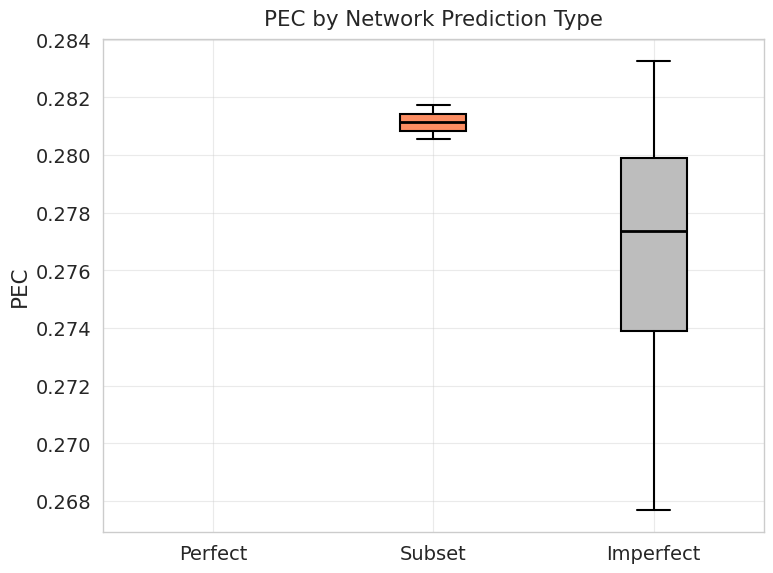

In [14]:
from collections import defaultdict
import seaborn as sns

target_sigma = 1  # Change this to 1-6

results_sigma = results_df[results_df['sigma'] == target_sigma]
grouped = defaultdict(list)

for idx, row in results_sigma.iterrows():
    net_nodes = set(row['net_ids'])
    pec_value = [float(e.strip()) for e in row['pec'].strip("[]").split(",")][-1]

    if N == 2:
        if net_nodes == group_a or net_nodes == group_b:
            category = "Perfect"
        elif net_nodes.issubset(group_a) or net_nodes.issubset(group_b):
            category = "Subset"
        else:
            category = "Imperfect"
    elif N == 3:
        if net_nodes in [group_a, group_b, group_c]:
            category = "Perfect"
        elif (net_nodes.issubset(group_a) or
              net_nodes.issubset(group_b) or
              net_nodes.issubset(group_c)):
            category = "Subset"
        else:
            category = "Imperfect"

    grouped[category].append(pec_value)

sns.set(style="whitegrid", context="paper", font_scale=1.6)

labels = ["Perfect", "Subset", "Imperfect"]
data = [grouped[label] for label in labels]
colors = ["#66c2a5", "#fc8d62", "#bdbdbd"]  # colorblind-friendly

fig, ax = plt.subplots()

bp = ax.boxplot(data,
                labels=labels,
                patch_artist=True,
                showfliers=False,  # hide outliers for clean publication
                medianprops=dict(color="black", linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5),
                boxprops=dict(linewidth=1.5))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel("PEC")
ax.set_title("PEC by Network Prediction Type", pad=10)

ax.tick_params(axis='both', which='major')

plt.tight_layout()

# Save high-res
plt.savefig(project_root/"data/figures/simulation/PEC_by_group_{}nets_{}bits_pairwise.png".format(N, bits))

plt.show()


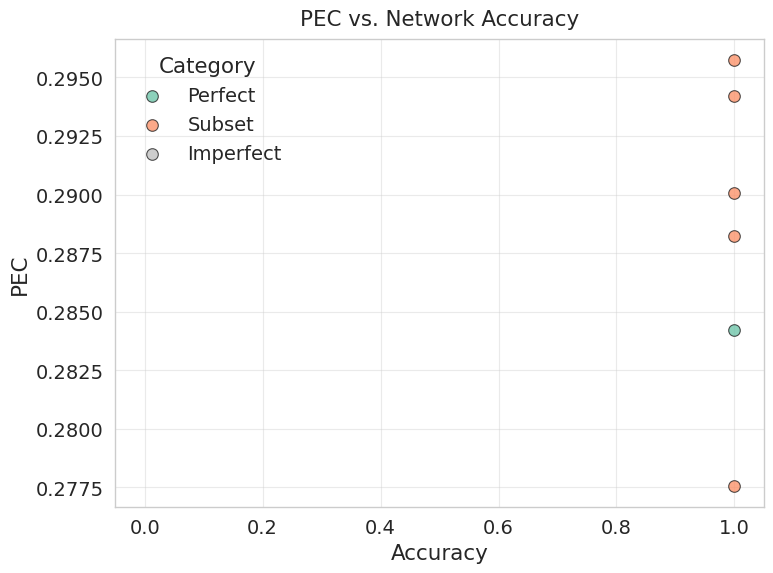

In [ ]:
accuracies = []
pec_values = []
categories = []
colors = []

color_map = {
    "Perfect": "#66c2a5",
    "Subset": "#fc8d62", 
    "Imperfect": "#bdbdbd"
}
for idx, row in results_sigma.iterrows():
    net_nodes = set(row['net_ids'])
    pec_value = [float(e.strip()) for e in row['pec'].strip("[]").split(",")][-1]

    if N == 2:
        overlap_a = len(net_nodes & group_a)
        overlap_b = len(net_nodes & group_b)
        max_overlap = max(overlap_a, overlap_b)
        accuracy = max_overlap / len(net_nodes)

        if net_nodes == group_a or net_nodes == group_b:
            category = "Perfect"
        elif net_nodes.issubset(group_a) or net_nodes.issubset(group_b):
            category = "Subset"
        else:
            category = "Imperfect"

    elif N == 3:
        overlap_a = len(net_nodes & group_a)
        overlap_b = len(net_nodes & group_b)
        overlap_c = len(net_nodes & group_c)
        max_overlap = max(overlap_a, overlap_b, overlap_c)
        accuracy = max_overlap / len(net_nodes)

        if net_nodes in [group_a, group_b, group_c]:
            category = "Perfect"
        elif (net_nodes.issubset(group_a) or
              net_nodes.issubset(group_b) or
              net_nodes.issubset(group_c)):
            category = "Subset"
        else:
            category = "Imperfect"

    accuracies.append(accuracy)
    pec_values.append(pec_value)
    categories.append(category)
    colors.append(color_map[category])


plt.figure()

for cat in ["Perfect", "Subset", "Imperfect"]:
    xs = [acc for acc, c in zip(accuracies, categories) if c == cat]
    ys = [pec for pec, c in zip(pec_values, categories) if c == cat]
    plt.scatter(xs, ys,
                label=cat,
                color=color_map[cat],
                edgecolor='k',
                s=70,
                alpha=0.75)

plt.xlabel("Accuracy")
plt.ylabel("PEC")
plt.title("PEC vs. Network Accuracy", pad=10)
plt.xlim(-0.05, 1.05)
plt.legend(title="Category", loc='upper left')
plt.tight_layout()

# Save high-quality version
plt.savefig(project_root/"data/figures/simulation/PEC_vs_Accuracy_{}nets_{}bits_pairwise.png".format(N, bits))

plt.show()


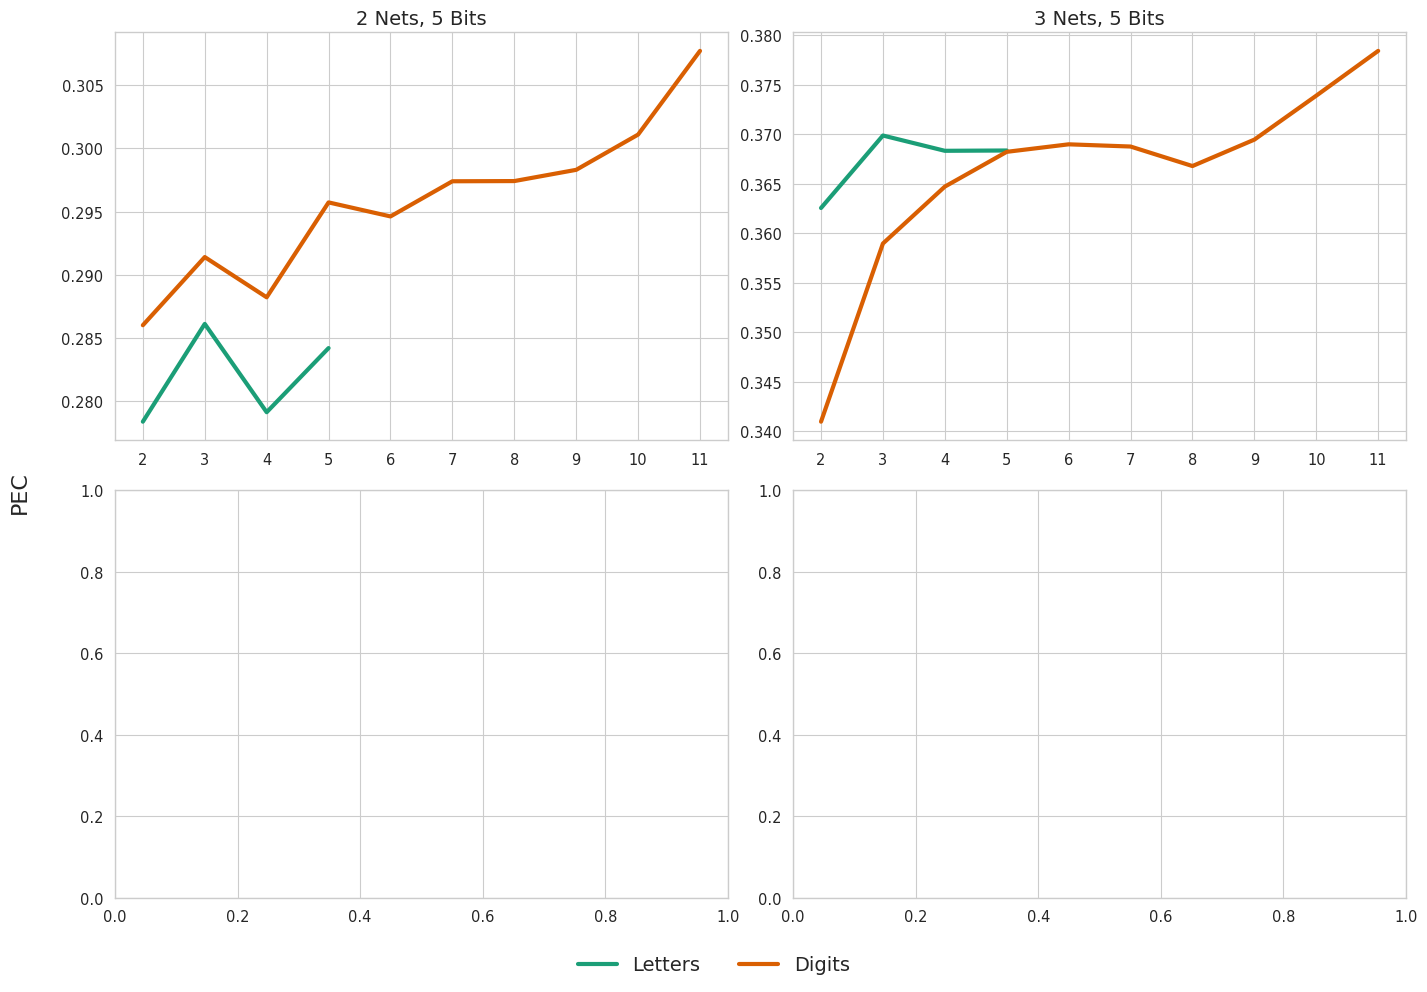

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define scenarios
scenarios = [(2, 5), (3, 5), (2, 6), (3, 6)]

# Store results for each subplot
plot_data = []

for N, bits in scenarios:

    # Define ground truth groups based on the number of networks and bits
    group_a, group_b, group_c = set(), set(), set()
    if N==2:
        if bits==5:
            group_a = {0, 1, 2, 3, 4}
            group_b = {5, 6, 7, 8, 9}
        elif bits==6:
            group_a = {0, 1, 2, 3, 4, 5}
            group_b = {6, 7, 8, 9, 10, 11}

    elif N==3:
        if bits==5:
            group_a = {0, 1, 2, 3, 4}
            group_b = {5, 6, 7, 8, 9}
            group_c = {10, 11, 12, 13, 14}
        elif bits==6:
            group_a = {0, 1, 2, 3, 4, 5}
            group_b = {6, 7, 8, 9, 10, 11}
            group_c = {12, 13, 14, 15, 16, 17}


    file_path = project_root/"data/output/simulation/pairwise/{}nets_{}bits.xlsx".format(N,bits)
    try:
        results_df = pd.read_excel(file_path, index_col=False)
    except FileNotFoundError:
        continue
    # Add relabeled nets to DataFrame
    results_df["net_ids"] = results_df["nets"].apply(relabel_net)
    
    e1 = e2 = e3 = None

    for idx, row in results_df.iterrows():
        try:
            net_tuple = row['net_ids']
            net_set = set(net_tuple)
            pec_vals = [float(e.strip()) for e in row['pec'].strip("[]").split(",")]

            if N == 2:
                if e1 is None and net_set == group_a:
                    e1 = pec_vals
                elif e2 is None and net_set == group_b:
                    e2 = pec_vals
                if e1 is not None and e2 is not None:
                    break
            elif N == 3:
                if e1 is None and net_set == group_a:
                    e1 = pec_vals
                elif e2 is None and net_set == group_b:
                    e2 = pec_vals
                elif e3 is None and net_set == group_c:
                    e3 = pec_vals
                if e1 is not None and e2 is not None and e3 is not None:
                    break
        except Exception:
            continue

    plot_data.append((N, bits, e1, e2, e3))

# Plot all scenarios into one figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for ax, (N, bits, e1, e2, e3) in zip(axes, plot_data):
    if e1 is None or e2 is None:
        continue

    ax.plot(e1, linewidth=3, color="#1b9e77", label="Letters")  # green-teal
    ax.plot(e2, linewidth=3, color="#d95f02", label="Digits")   # orange
    if N == 3 and e3 is not None:
        ax.plot(e3, linewidth=3, color="#7570b3", linestyle='--', label="Mix")  # purple dashed


    ax.set_title(f"{N} Nets, {bits} Bits", size=14)
    ax.set_xticks(list(range(len(e2))))
    ax.set_xticklabels(list(range(2, len(e2)+2)))
    if bits==6: ax.set_xlabel("Number of nodes", fontsize=14)

# Add shared x-label and y-label
fig.text(0.05, 0.5, 'PEC', va='center', rotation='vertical', fontsize=16)

# Shared legend and layout
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False, fontsize=14)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.subplots_adjust(left=0.12)  # increase left margin to fit label

plt.savefig(project_root/"data/figures/simulation/PEC_evolution_composite_pairwise.png", dpi=300)
plt.show()


Skipping group 'Imperfect Prediction' in N=2, bits=5 due to insufficient samples (n=1)
Skipping group 'Perfect Prediction' in N=2, bits=6 due to insufficient samples (n=0)
Skipping group 'Subset' in N=2, bits=6 due to insufficient samples (n=2)
Not enough groups with sufficient samples for stats in N=2, bits=6
Skipping group 'Perfect Prediction' in N=3, bits=6 due to insufficient samples (n=0)
Skipping group 'Subset' in N=3, bits=6 due to insufficient samples (n=2)
Not enough groups with sufficient samples for stats in N=3, bits=6


/tmp/ipykernel_168249/3782857611.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,
/tmp/ipykernel_168249/3782857611.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,
/tmp/ipykernel_168249/3782857611.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,
/tmp/ipykernel_168249/3782857611.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data,


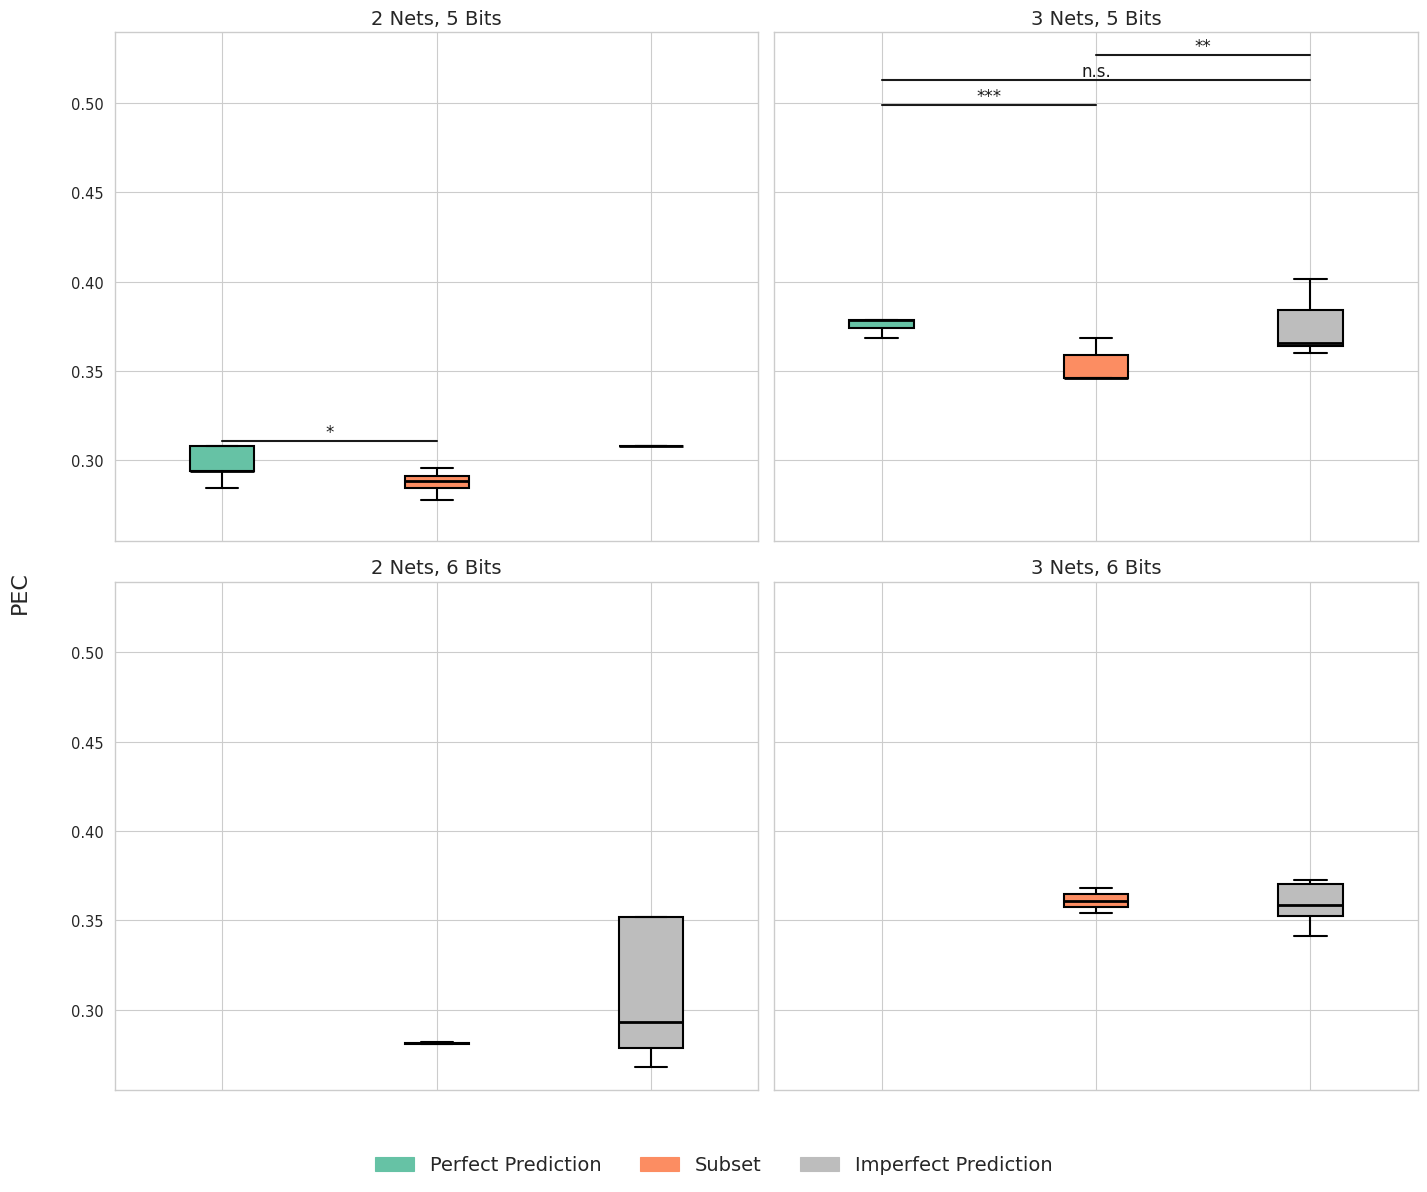

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu, shapiro, levene, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from collections import defaultdict
import pandas as pd
import ast
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set(style="whitegrid", context="paper", font_scale=1.2)

scenarios = [
    (2, 5),
    (3, 5),
    (2, 6),
    (3, 6)
]

labels = ["Perfect Prediction", "Subset", "Imperfect Prediction"]
colors = ["#66c2a5", "#fc8d62", "#bdbdbd"]  # colorblind-friendly
MIN_SAMPLES = 5  # minimum samples to perform stats

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=True)
axes = axes.flatten()

def get_significance_label(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'n.s.'

for ax, (N, bits) in zip(axes, scenarios):

    # Define ground truth groups based on the number of networks and bits
    group_a, group_b, group_c = set(), set(), set()
    if N==2:
        if bits==5:
            group_a = {0, 1, 2, 3, 4}
            group_b = {5, 6, 7, 8, 9}
        elif bits==6:
            group_a = {0, 1, 2, 3, 4, 5}
            group_b = {6, 7, 8, 9, 10, 11}

    elif N==3:
        if bits==5:
            group_a = {0, 1, 2, 3, 4}
            group_b = {5, 6, 7, 8, 9}
            group_c = {10, 11, 12, 13, 14}
        elif bits==6:
            group_a = {0, 1, 2, 3, 4, 5}
            group_b = {6, 7, 8, 9, 10, 11}
            group_c = {12, 13, 14, 15, 16, 17}

    # Load and group data
    results_df = pd.read_excel(
        project_root / f"data/output/simulation/pairwise/{N}nets_{bits}bits.xlsx",
        index_col=False
    )
    # Add relabeled nets to DataFrame
    results_df["net_ids"] = results_df["nets"].apply(relabel_net)
    grouped = defaultdict(list)

    for idx, row in results_df.iterrows():
        net_tuple = row['net_ids']
        net_nodes = set(net_tuple)
        pec_value = [float(e.strip()) for e in row['pec'].strip("[]").split(",")][-1]

        if N == 2:
            if net_nodes == group_a or net_nodes == group_b:
                category = "Perfect Prediction"
            elif net_nodes.issubset(group_a) or net_nodes.issubset(group_b):
                category = "Subset"
            else:
                category = "Imperfect Prediction"
        elif N == 3:
            if net_nodes in [group_a, group_b, group_c]:
                category = "Perfect Prediction"
            elif (net_nodes.issubset(group_a) or
                  net_nodes.issubset(group_b) or
                  net_nodes.issubset(group_c)):
                category = "Subset"
            else:
                category = "Imperfect Prediction"

        grouped[category].append(pec_value)

    data = [grouped[label] for label in labels]

    # Filter groups with insufficient data for stats
    filtered_labels = []
    filtered_data = []
    for label_, vals_ in zip(labels, data):
        if len(vals_) >= MIN_SAMPLES:
            filtered_labels.append(label_)
            filtered_data.append(vals_)
        else:
            print(f"Skipping group '{label_}' in N={N}, bits={bits} due to insufficient samples (n={len(vals_)})")

    # Boxplot with original full groups for aesthetics, 
    # but only annotate stats for filtered groups
    bp = ax.boxplot(data,
                    labels=labels,
                    patch_artist=True,
                    showfliers=False,
                    medianprops=dict(color="black", linewidth=2),
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    boxprops=dict(linewidth=1.5))

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(f"{N} Nets, {bits} Bits", size=14)
    ax.tick_params(axis='both', which='major')

    # Prepare significance dictionary
    sig_results = {}

    # Only run stats if at least 2 groups have sufficient data
    if len(filtered_data) >= 2:
        # Test normality of each group
        normality = [shapiro(vals)[1] > 0.05 for vals in filtered_data]

        # Test homogeneity of variances
        levene_p = levene(*filtered_data)[1] if len(filtered_data) > 1 else 1.0

        # Prepare data for ANOVA if normality & homoscedasticity hold
        data_long = pd.DataFrame({
            "PEC": sum(filtered_data, []),
            "Group": sum([[label]*len(vals) for label, vals in zip(filtered_labels, filtered_data)], [])
        })

        if all(normality) and levene_p > 0.05:
            # Parametric ANOVA + Tukey
            model = ols('PEC ~ Group', data=data_long).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            # print(f"ANOVA results for N={N}, bits={bits}\n", anova_table)

            tukey = pairwise_tukeyhsd(endog=data_long["PEC"], groups=data_long["Group"], alpha=0.05)

            # Collect pairwise significance labels from Tukey
            for res in tukey._results_table.data[1:]:
                g1, g2, meandiff, p_adj, lower, upper, reject = res
                sig_results[(g1, g2)] = get_significance_label(p_adj)

        else:
            # Non-parametric Kruskal-Wallis + Mann-Whitney
            stat, p = kruskal(*filtered_data)
            # print(f"Kruskal-Wallis H={stat:.3f}, p={p:.3f} for N={N}, bits={bits}")

            for (i, j) in combinations(range(len(filtered_labels)), 2):
                u_stat, u_p = mannwhitneyu(filtered_data[i], filtered_data[j], alternative='two-sided')
                sig_results[(filtered_labels[i], filtered_labels[j])] = get_significance_label(u_p)
    else:
        print(f"Not enough groups with sufficient samples for stats in N={N}, bits={bits}")

    # Add significance annotations between all pairs of labels on full labels list
    y_max = max([max(group) if group else 0 for group in data])
    y_min = min([min(group) if group else 0 for group in data])
    y_range = y_max - y_min if y_max != y_min else 1

    for i, (g1, g2) in enumerate(combinations(labels, 2)):
        x1, x2 = labels.index(g1) + 1, labels.index(g2) + 1
        y, h, col = y_max + (i + 1) * 0.1 * y_range, 0, 'k'
        significance = sig_results.get((g1, g2)) or sig_results.get((g2, g1)) or 'n.s.'

        # Only annotate if significance result is known (groups had enough samples)
        if (g1 in filtered_labels) and (g2 in filtered_labels):
            ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
            ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color=col, fontsize=12)

# Remove x-axis labels for all subplots for cleaner look
for ax in axes:
    ax.set_xticklabels([])

# Create and add shared legend
patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, labels)]
fig.legend(handles=patches, loc='lower center', ncol=3, frameon=False, fontsize=14)

# Add shared x-label and y-label
fig.text(0.05, 0.5, 'PEC', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.subplots_adjust(left=0.12)  # increase left margin to fit label
plt.savefig(project_root/"data/figures/simulation/PEC_by_group_composite_pairwise.png", dpi=300)
plt.show()
